In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import statsmodels.formula.api as statsmodel
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import zscore      
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv(r"C:\Users\Rishima\Desktop\capstone\Insurance_Marketing-Customer-Value-Analysis.csv")

In [4]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0         2/24/2011         Employed      F   56274      Suburban   
1         1/31/2011       Unemployed      F       0      Suburban   
2         2/19/2011         Employed      F   48767      Suburban   
3         1/20/2011       Unemployed      M       0      Suburban   
4          2/3/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [5]:
df.shape

(9134, 24)

In [6]:
df['Renew Offer Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [7]:
df.info()
# There are no missing values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

# Univariate Analysis

In [8]:
columns_int = df.select_dtypes(include = 'number')

In [9]:
l1=list(columns_int.columns)

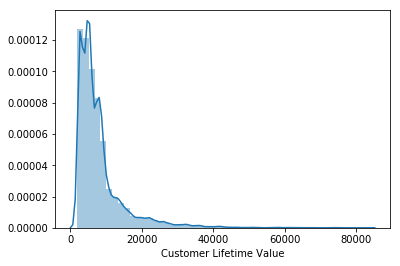

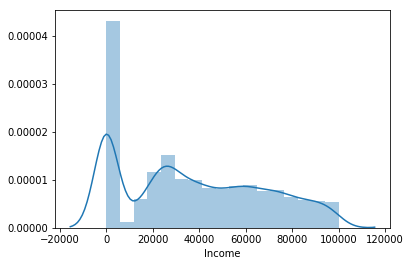

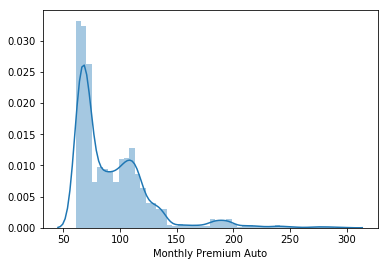

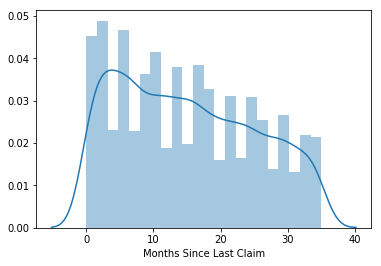

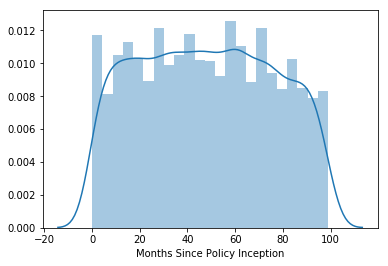

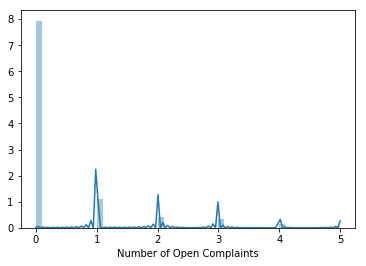

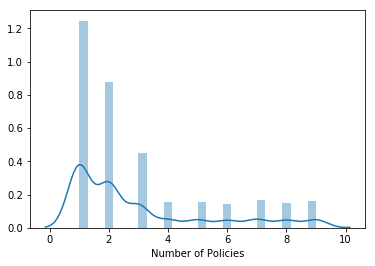

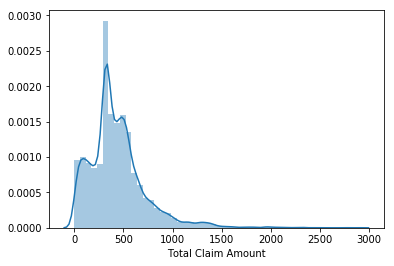

In [10]:
for i in range(0,len(l1)):
    sns.distplot(columns_int[l1[i]])
    plt.show()
    
# We see that claims, premium and lifetime value all are highly rightwards skewed.

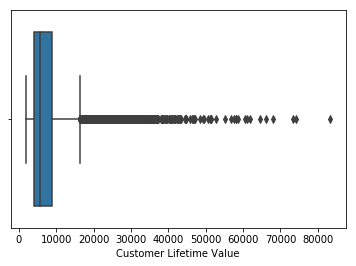

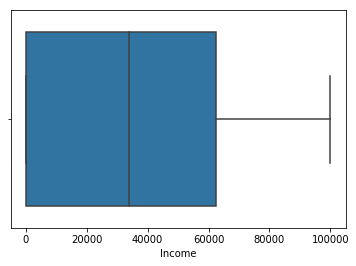

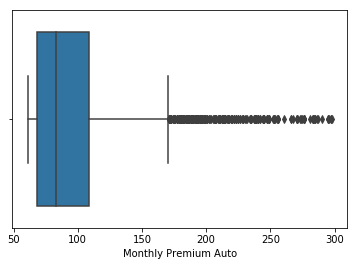

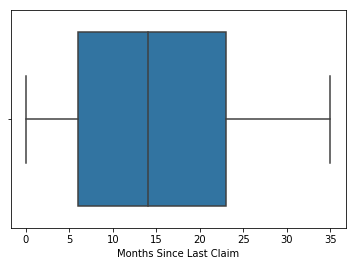

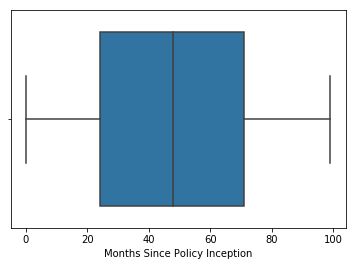

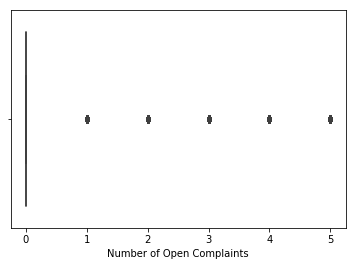

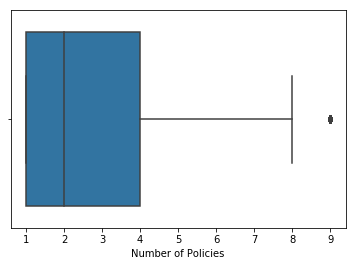

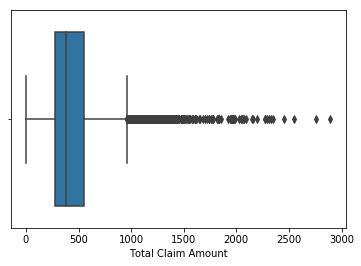

In [11]:
for i in range(0,len(l1)):
    sns.boxplot(columns_int[l1[i]])
    plt.show()
    
# We see that claims, premium and lifetime value all have outliers present.

In [12]:
columns = df.select_dtypes(include = 'object')

In [13]:
columns.drop(['Customer', 'Effective To Date'], axis=1, inplace=True)

C:\Users\Rishima\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
l2=list(columns.columns)

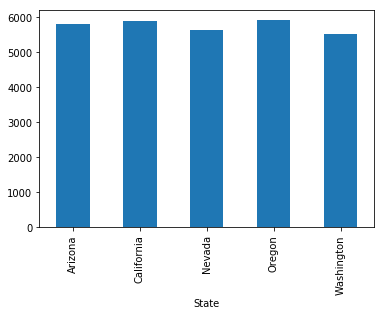

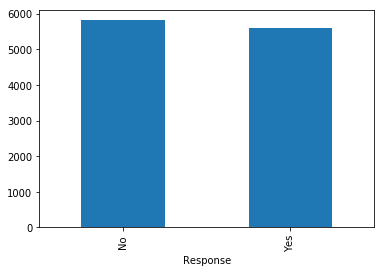

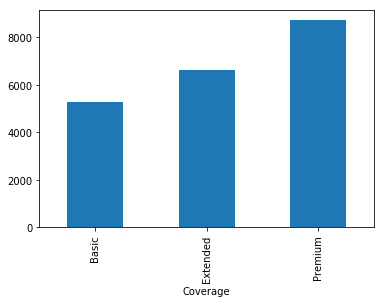

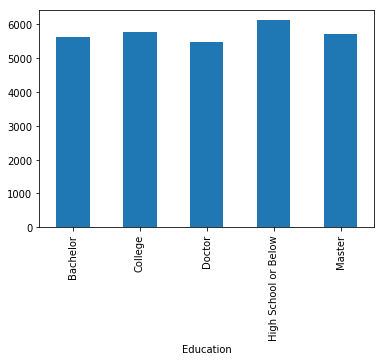

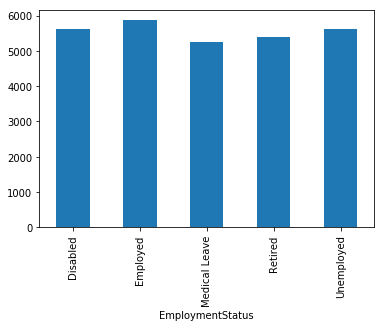

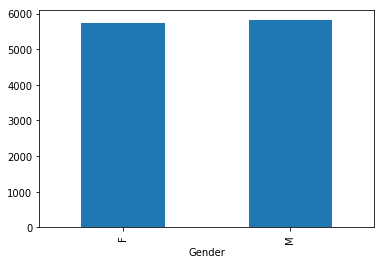

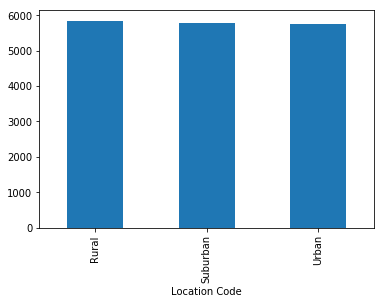

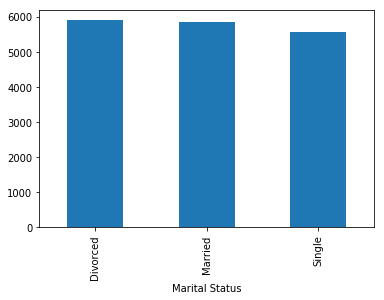

In [15]:
for i in range(0,len(l1)):
    df.groupby(columns[l2[i]])['Customer Lifetime Value'].median().plot(kind='bar')
    plt.show()

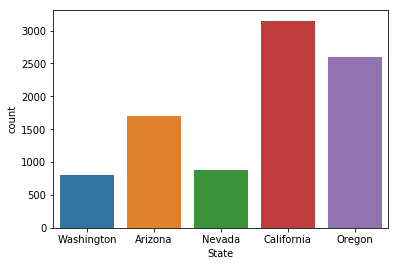

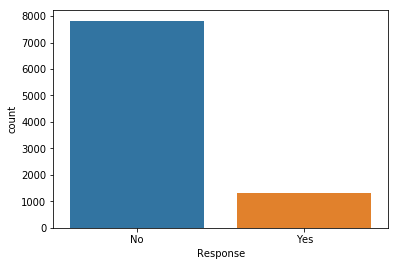

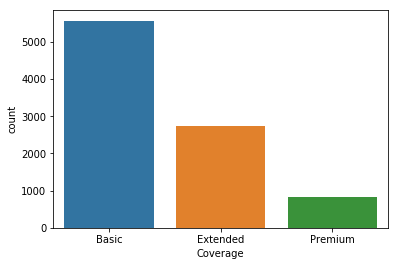

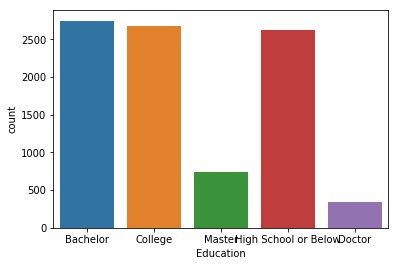

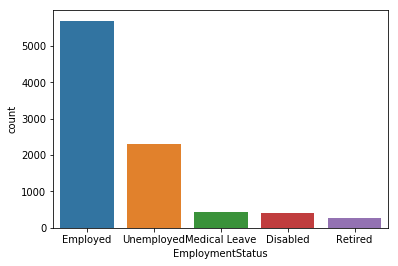

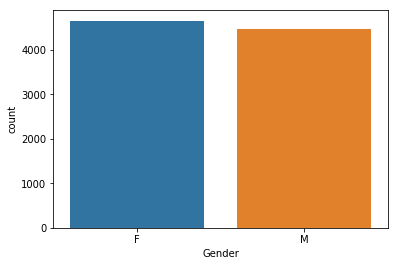

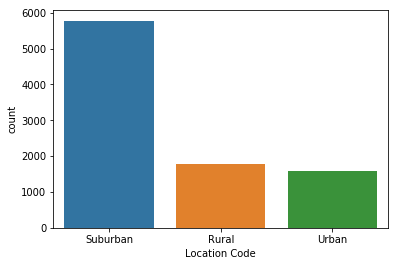

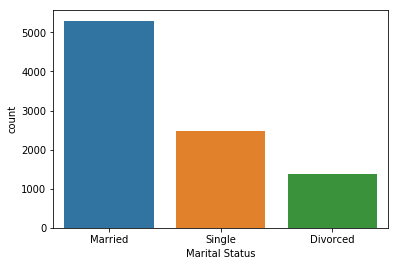

In [16]:
for i in range(0,len(l1)):
    sns.countplot(columns[l2[i]])
    plt.show()

# Bivariate Analysis

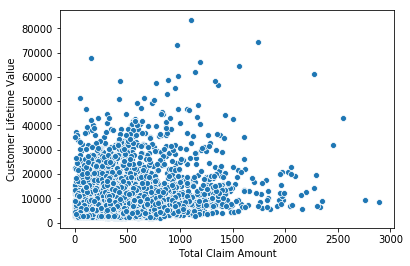

In [17]:
sns.scatterplot(df['Total Claim Amount'], df['Customer Lifetime Value'])

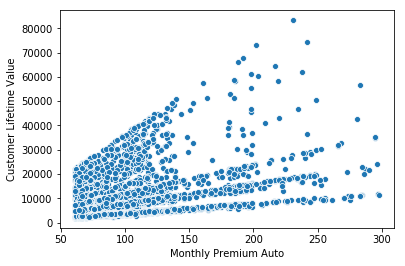

In [18]:
sns.scatterplot(df['Monthly Premium Auto'], df['Customer Lifetime Value'])

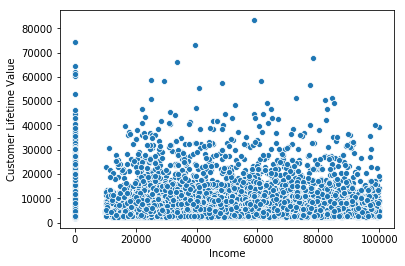

In [19]:
sns.scatterplot(df['Income'], df['Customer Lifetime Value'])

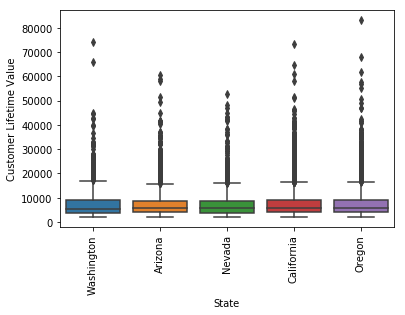

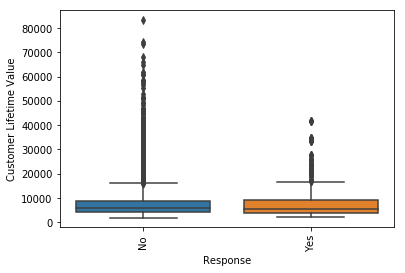

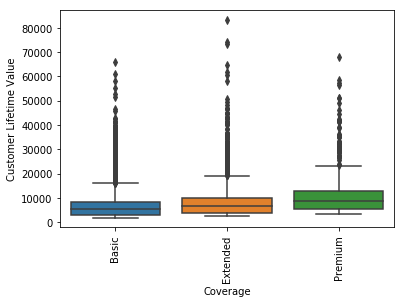

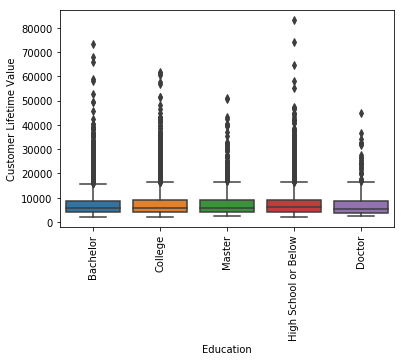

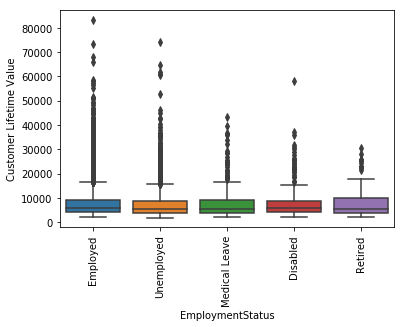

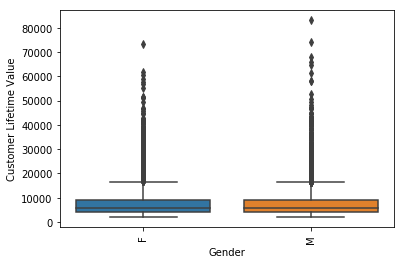

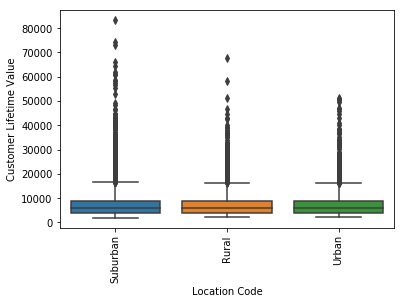

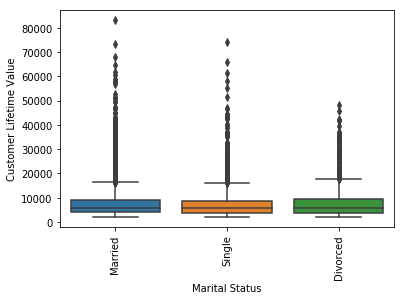

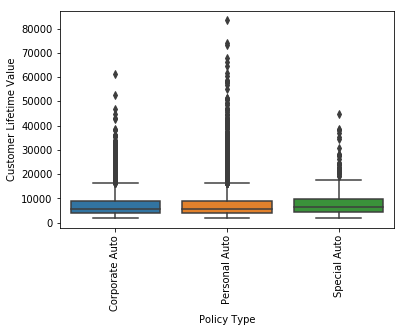

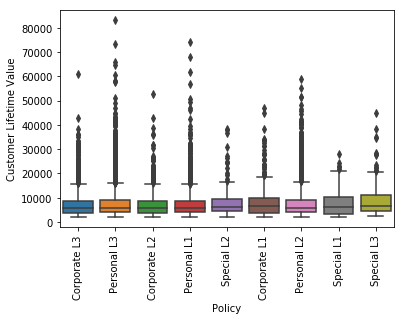

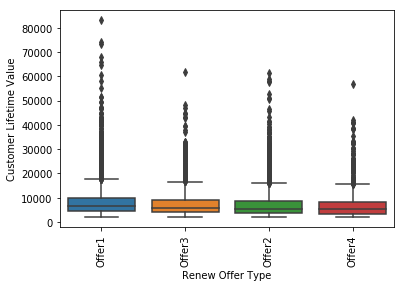

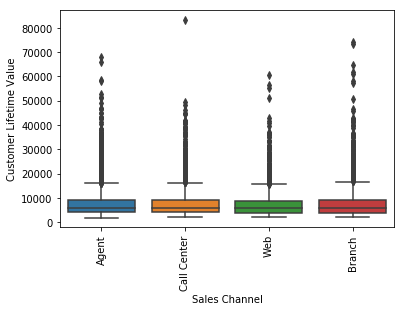

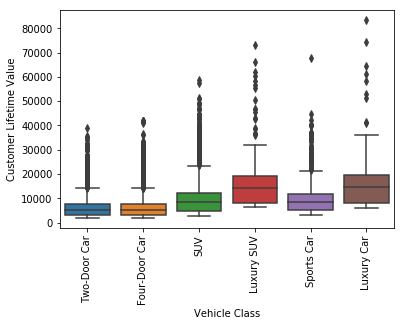

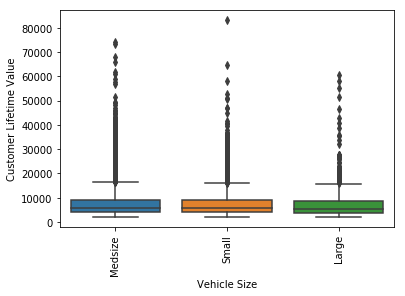

In [20]:
for i in range(0,len(l2)):
    sns.boxplot(l2[i], df['Customer Lifetime Value'],data=df)
    plt.xticks(rotation=90)
    plt.show()

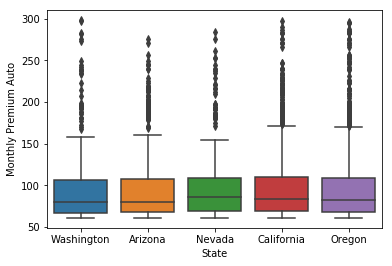

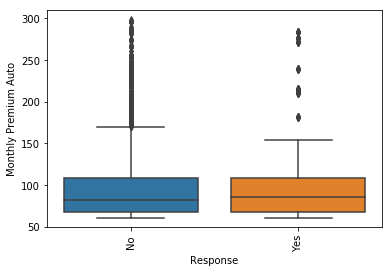

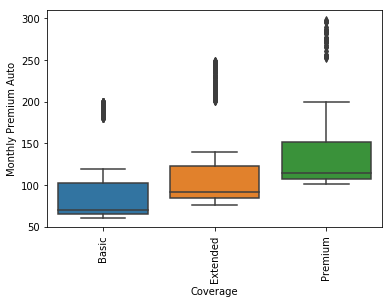

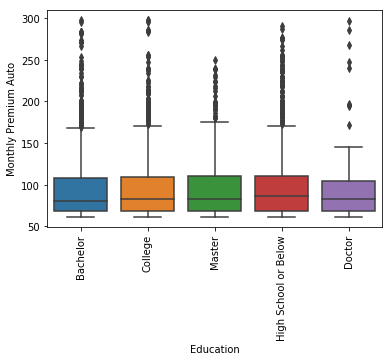

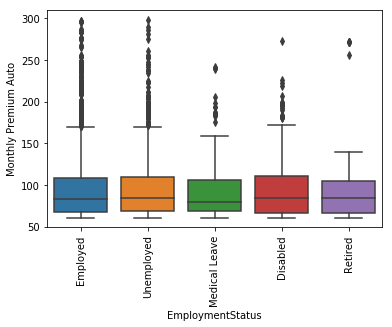

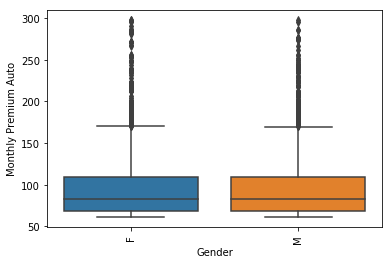

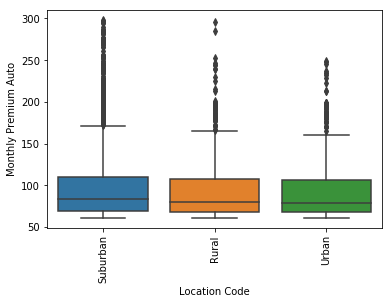

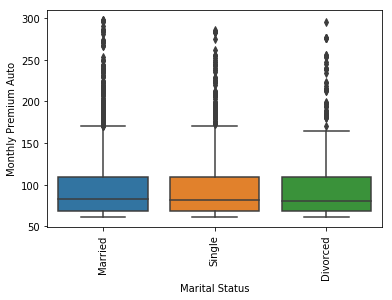

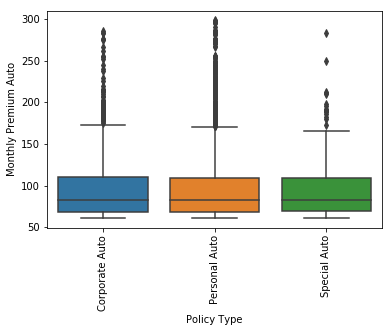

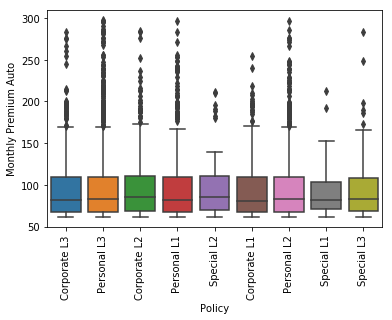

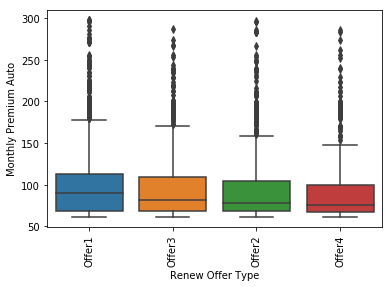

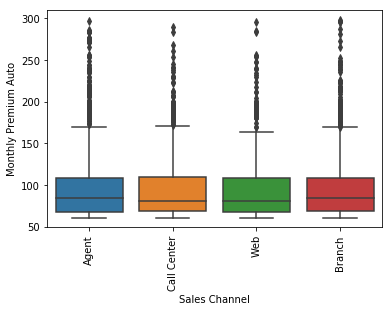

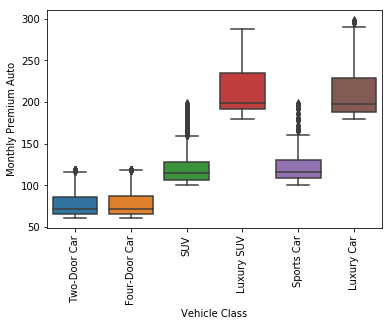

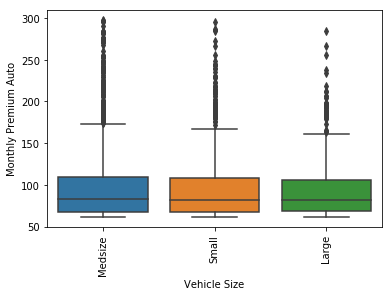

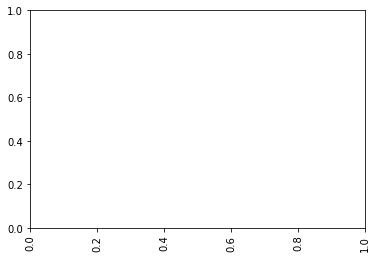

In [21]:
for i in range(0,len(l2)):
    sns.boxplot(l2[i],df['Monthly Premium Auto'],data=df)
    plt.show()
    plt.xticks(rotation=90)

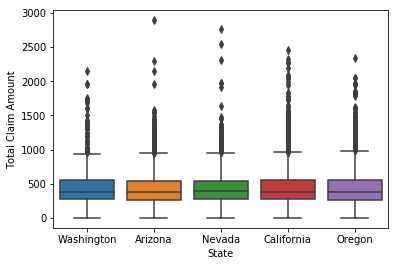

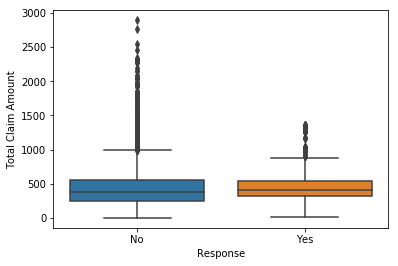

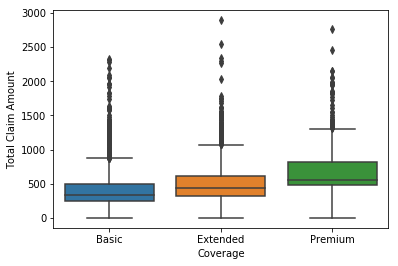

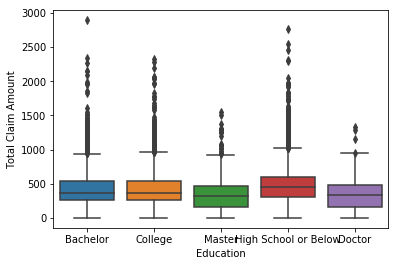

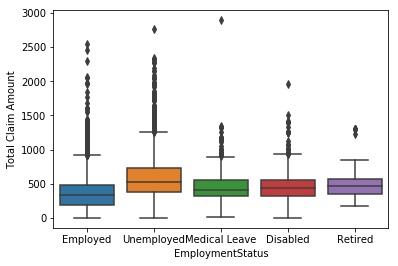

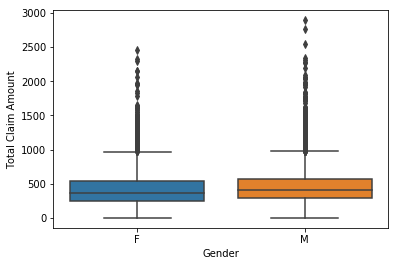

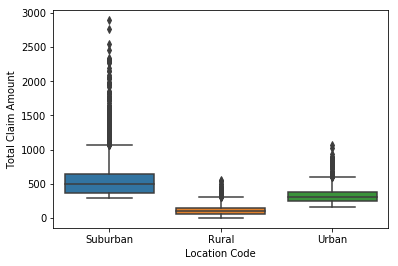

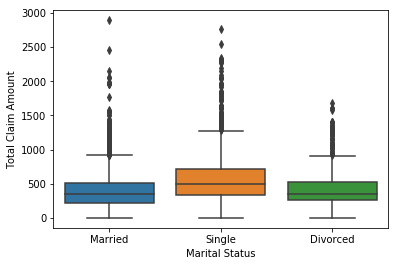

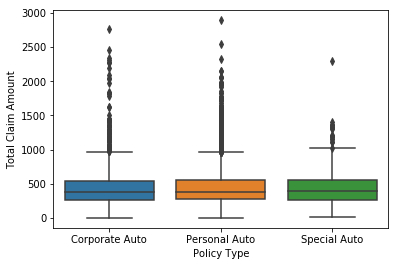

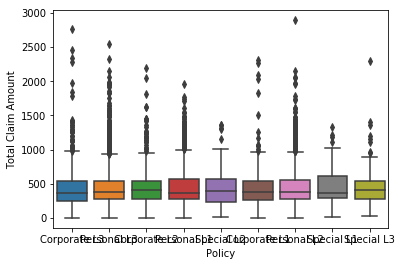

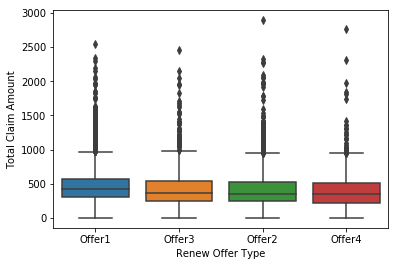

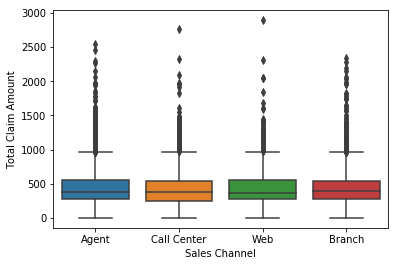

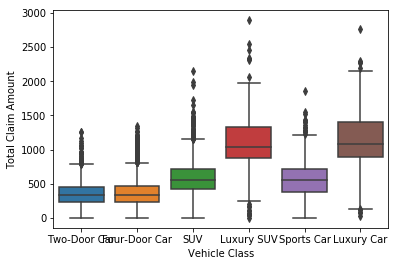

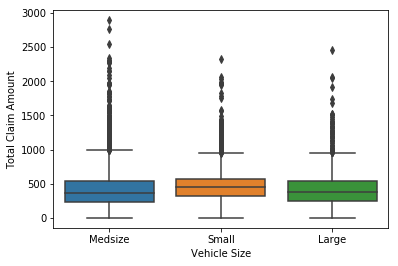

In [22]:
for i in range(0,len(l2)):
    sns.boxplot(l2[i],df['Total Claim Amount'],data=df)
    plt.show()

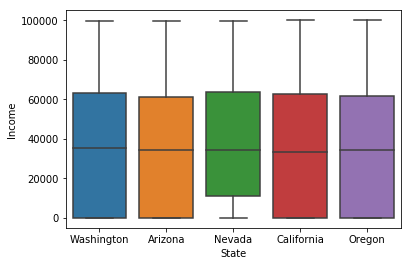

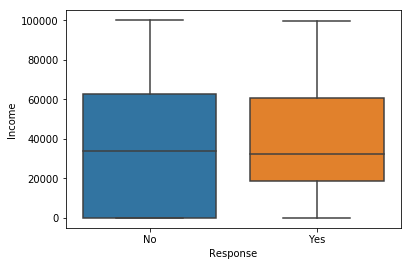

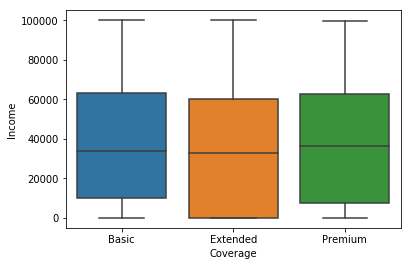

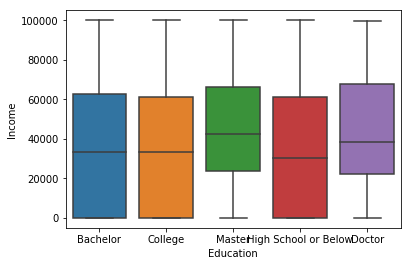

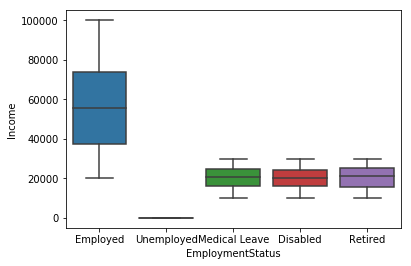

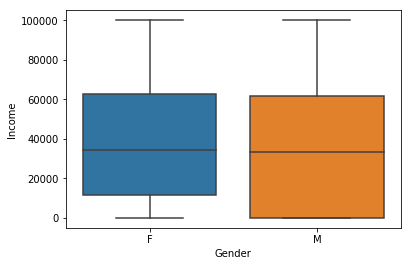

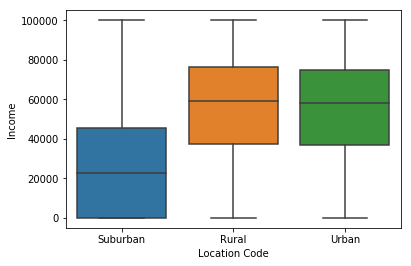

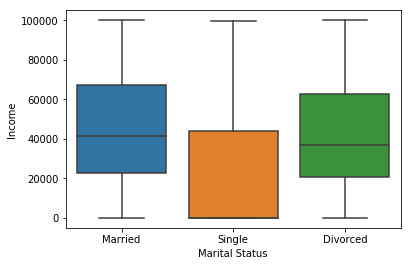

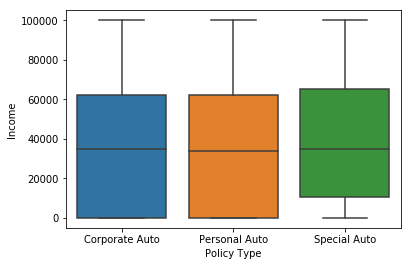

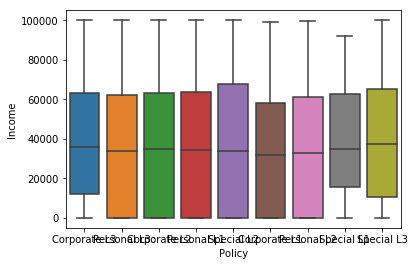

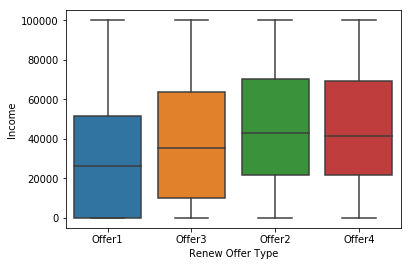

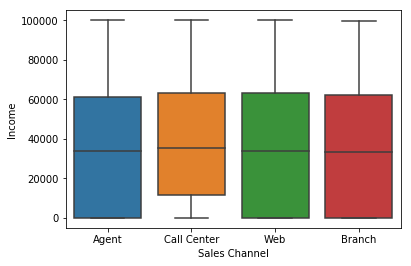

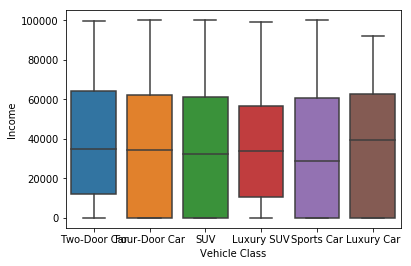

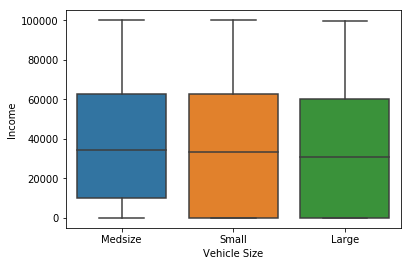

In [23]:
for i in range(0,len(l2)):
    sns.boxplot(l2[i],df['Income'],data=df)
    plt.show()

# Multivariate Analysis

In [24]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [25]:
df.describe(include=['O'])

Customer       State Response Coverage Education Effective To Date  \
count      9134        9134     9134     9134      9134              9134   
unique     9134           5        2        3         5                59   
top     VA94160  California       No    Basic  Bachelor         1/10/2011   
freq          1        3150     7826     5568      2748               195   

       EmploymentStatus Gender Location Code Marital Status    Policy Type  \
count              9134   9134          9134           9134           9134   
unique                5      2             3              3              3   
top            Employed      F      Suburban        Married  Personal Auto   
freq               5698   4658          5779           5298           6788   

             Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
count          9134             9134          9134           9134         9134  
unique            9                4             4              6            3  
top     Personal L3           Offer1         Agent  Four-Door Car      Medsize  
freq           3426             3752          3477           4621         6424

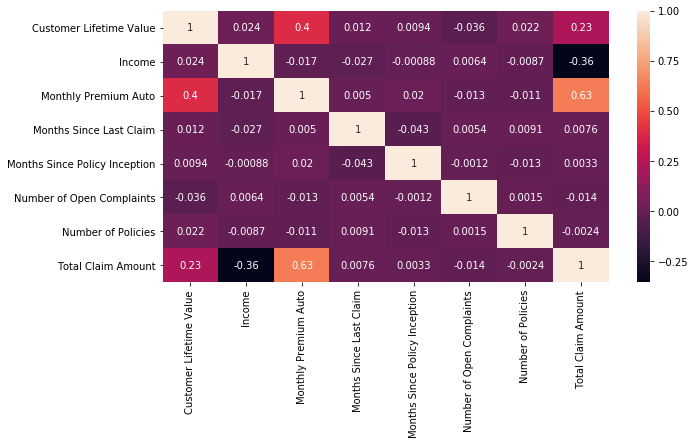

In [26]:
plt.figure(figsize=[10, 5])
sns.heatmap(df.corr(), annot=True)
# Our target Variable is Customer Lifetime Value, we see that claim amount and monthly premium have strong 
# correlation with it.
# Also, Claim and Premium in themselves have strong correlation
# Income and Claim amount have negative correlation

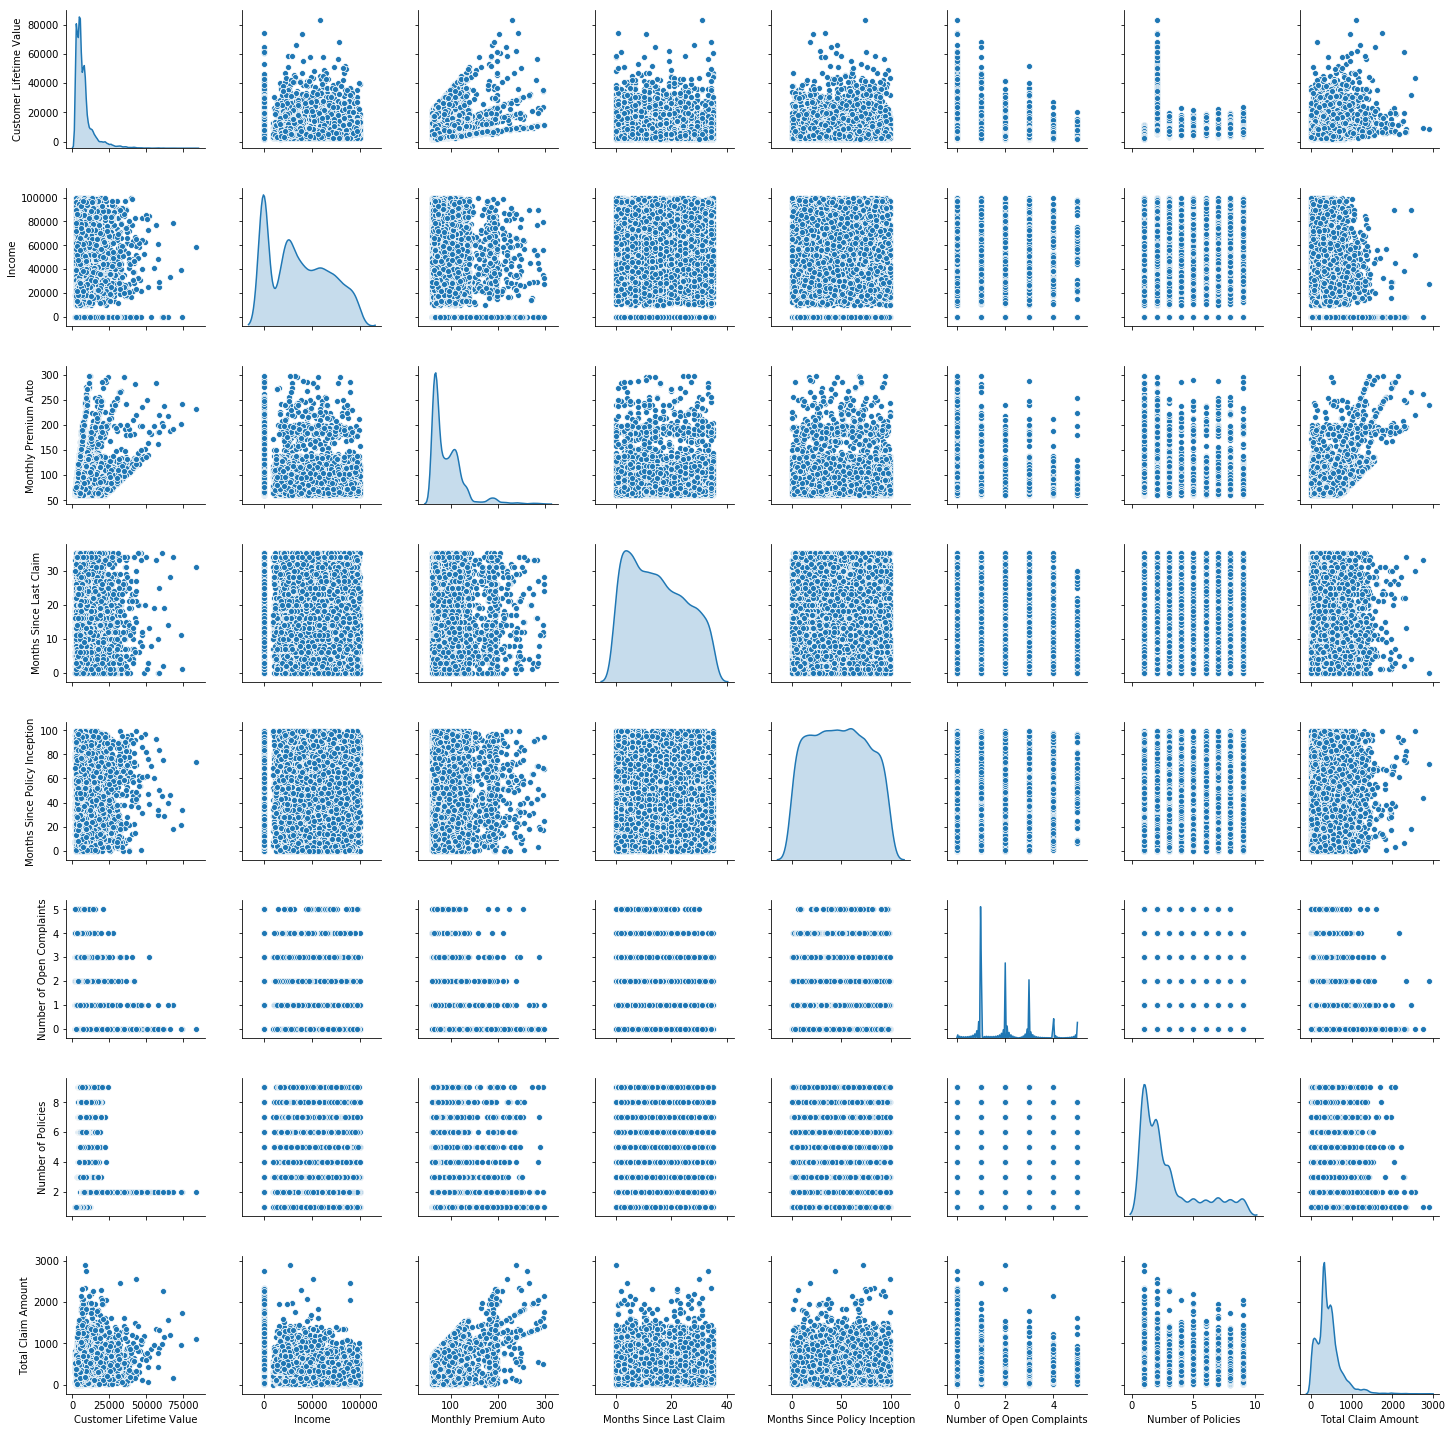

In [27]:
sns.pairplot(df, diag_kind='kde')

# We see that Custome Lifetime Value and Income has no correlation.
# Customer Lifetime Value and Premium have heteroskedastic plot.
# Customer Lifetime Value and Claim also have heteroskedastic plot.
# Premium and Claim also have heteroskedastic plot.

# General Pattern Recognition Analysis

In [28]:
df[df['Income']==0]

# The income 0 is of people who are unemployed.

# Can remove policy and customer id and effective to date.

# TCA < 15 is from rural areas only

# rural areas have only two-door, four-door, SUV and Sports_car 

# MPA can be normalized by taking particular coverage and vehicle_class

Customer       State  Customer Lifetime Value Response  Coverage  \
1     QZ44356     Arizona              6979.535903       No  Extended   
3     WW63253  California              7645.861827       No     Basic   
7     CF85061     Arizona              7216.100311       No   Premium   
10    SX51350  California              4738.992022       No     Basic   
11    VQ65197  California              8197.197078       No     Basic   
23    TZ98966      Nevada              2450.190996       No     Basic   
26    US89481  California              3946.372085       No   Premium   
32    PF41800  California              4715.321344       No     Basic   
38    CM61827      Oregon              3090.034104       No  Extended   
40    QG25316      Nevada              2652.061785       No     Basic   
46    BU27331     Arizona              4468.510542       No     Basic   
48    KP34198  California              3343.875326       No  Extended   
49    SH90947     Arizona              2294.478927       No     Basic   
57    FS37417     Arizona              3958.002823       No     Basic   
62    FG63582      Oregon              3339.764873       No  Extended   
64    WB37082     Arizona              6613.973653       No     Basic   
68    GW33762      Oregon              6846.150323      Yes  Extended   
73    HB20453      Oregon              6781.270203       No     Basic   
80    ZU35962  California              8025.229358       No  Extended   
94    ON44465  California              5313.294035       No  Extended   
100   UG93476  California              8002.308333      Yes     Basic   
101   AB96670  California              2393.915369      Yes     Basic   
104   UN51653  California              9402.729769       No  Extended   
107   DE75225      Oregon              8717.561149       No     Basic   
115   JI70886  California              7290.069769       No     Basic   
120   YT36855  Washington              2981.875575       No  Extended   
129   RB50392  Washington              7838.068321       No     Basic   
134   BU44523     Arizona              8026.379641       No     Basic   
135   MS41162     Arizona              4022.963529       No     Basic   
137   RB81636  Washington              2274.775451       No     Basic   
140   DS81757      Oregon              2470.121222       No     Basic   
142   LP84436  California              9047.119209       No  Extended   
144   LM19287      Oregon              3731.504584      Yes  Extended   
146   AZ82578  California              7928.829252       No     Basic   
149   EK59571      Oregon              3885.456401      Yes   Premium   
160   ND87334  California              2287.596920       No     Basic   
162   YL74911  California              8714.922135      Yes     Basic   
164   HL53154  California              7416.197322       No  Extended   
166   IC13702  California              6968.341900       No     Basic   
167   BE10809  California              4250.282624      Yes     Basic   
169   TH95618  California             21343.465990       No     Basic   
173   OE75747      Nevada              2189.642522       No     Basic   
178   IX37561  Washington              5097.763337       No     Basic   
180   IU25463  California             12252.601790       No   Premium   
184   AB13432  California              3735.838129       No     Basic   
191   XK33449  California              2383.731879       No     Basic   
194   EN21086     Arizona              6889.097981       No     Basic   
198   EH41854  Washington             23706.113370       No  Extended   
203   ZX64745  California              7923.136624       No     Basic   
204   FL34139  California              3688.110888       No     Basic   
205   TS11219  California             12067.455990       No     Basic   
218   KY33386  Washington              8007.399376      Yes     Basic   
226   KQ51983      Nevada              5159.369746       No     Basic   
230   XV84099     Arizona              5504.139033      Yes    

### ANOVA TEST

In [29]:
df.rename({'Customer Lifetime Value':'CLV', 'Location Code':'Location_Code', 'Monthly Premium Auto':'MPA', 
           'Total Claim Amount':'TCA', 'Sales Channel':'Sales_Channel', 'Policy Type':'Policy_Type', 'Vehicle Class': 'Vehicle_Class', 
           'Marital Status':'Marital_Status', 'Vehicle Size':'Vehicle_Size'}, inplace=True, axis=1)

In [30]:
model = ols("CLV ~ Coverage", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq           F        PR(>F)
Coverage     2.0  1.226530e+10  6.132650e+09  133.675114  6.015897e-58
Residual  9131.0  4.189054e+11  4.587728e+07         NaN           NaN


In [31]:
print(pairwise_tukeyhsd(df['CLV'], df['Coverage']))

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1   group2   meandiff   lower     upper   reject
------------------------------------------------------
 Basic   Extended 1598.9712 1228.5544  1969.388  True 
 Basic   Premium  3704.8967 3112.2735 4297.5198  True 
Extended Premium  2105.9255 1475.1616 2736.6893  True 
------------------------------------------------------


In [32]:
model = ols("TCA ~ Coverage", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq           F         PR(>F)
Coverage     2.0  6.171094e+07  3.085547e+07  397.363978  3.372121e-166
Residual  9131.0  7.090257e+08  7.765039e+04         NaN            NaN


In [33]:
print(pairwise_tukeyhsd(df['TCA'], df['Coverage']))

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower    upper   reject
---------------------------------------------------
 Basic   Extended 101.5426 86.3033  116.7818  True 
 Basic   Premium  272.3539 247.9729 296.7349  True 
Extended Premium  170.8114 144.8612 196.7615  True 
---------------------------------------------------


In [34]:
model = ols("MPA ~ Coverage", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq            F  PR(>F)
Coverage     2.0  2.302702e+06  1.151351e+06  1235.378095     0.0
Residual  9131.0  8.509932e+06  9.319825e+02          NaN     NaN


In [35]:
print(pairwise_tukeyhsd(df['MPA'], df['Coverage']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 Basic   Extended 21.4057  19.7361 23.0752  True 
 Basic   Premium  51.2072  48.5362 53.8783  True 
Extended Premium  29.8016  26.9586 32.6445  True 
-------------------------------------------------


In [36]:
model = ols("CLV ~ Sales_Channel", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq         F    PR(>F)
Sales_Channel     3.0  1.247171e+08  4.157236e+07  0.880545  0.450278
Residual       9130.0  4.310460e+11  4.721205e+07       NaN       NaN


In [37]:
model = ols("TCA ~ Sales_Channel", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq         F    PR(>F)
Sales_Channel     3.0  1.338658e+05  44621.925499  0.528675  0.662574
Residual       9130.0  7.706028e+08  84403.370713       NaN       NaN


In [38]:
model = ols("CLV ~ Vehicle_Class", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq           F         PR(>F)
Vehicle_Class     5.0  5.504256e+10  1.100851e+10  267.158117  2.085526e-267
Residual       9128.0  3.761282e+11  4.120598e+07         NaN            NaN


In [39]:
print(pairwise_tukeyhsd(df['CLV'], df['Vehicle_Class']))

         Multiple Comparison of Means - Tukey HSD,FWER=0.05         
    group1       group2      meandiff     lower      upper    reject
--------------------------------------------------------------------
Four-Door Car  Luxury Car   10421.6218  8963.4761  11879.7675  True 
Four-Door Car  Luxury SUV   10491.2725  9115.8475  11866.6975  True 
Four-Door Car     SUV       3811.7852   3303.0263  4320.5441   True 
Four-Door Car  Sports Car   4119.2627   3245.1361  4993.3893   True 
Four-Door Car Two-Door Car   39.3041    -460.6368   539.2451  False 
  Luxury Car   Luxury SUV    69.6507    -1898.3676 2037.6691  False 
  Luxury Car      SUV       -6609.8366  -8106.5456 -5113.1276  True 
  Luxury Car   Sports Car   -6302.3591  -7959.2838 -4645.4344  True 
  Luxury Car  Two-Door Car -10382.3177 -11876.0523 -8888.583   True 
  Luxury SUV      SUV       -6679.4873  -8095.7299 -5263.2448  True 
  Luxury SUV   Sports Car   -6372.0098  -7956.6248 -4787.3948  True 
  Luxury SUV  Two-Door Car -10451.

In [40]:
model = ols("TCA ~ Vehicle_Class", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq          F  PR(>F)
Vehicle_Class     5.0  2.436778e+08  4.873556e+07  844.03904     0.0
Residual       9128.0  5.270588e+08  5.774089e+04        NaN     NaN


In [41]:
print(pairwise_tukeyhsd(df['TCA'], df['Vehicle_Class']))

       Multiple Comparison of Means - Tukey HSD,FWER=0.05      
    group1       group2     meandiff   lower     upper   reject
---------------------------------------------------------------
Four-Door Car  Luxury Car   778.5286  723.945   833.1122  True 
Four-Door Car  Luxury SUV   740.7647  689.2776  792.2518  True 
Four-Door Car     SUV       217.8126  198.768   236.8573  True 
Four-Door Car  Sports Car   206.3876  173.6659  239.1093  True 
Four-Door Car Two-Door Car  -1.2174   -19.932   17.4971  False 
  Luxury Car   Luxury SUV   -37.7639 -111.4339  35.9061  False 
  Luxury Car      SUV       -560.716 -616.7432 -504.6888  True 
  Luxury Car   Sports Car   -572.141 -634.1656 -510.1163  True 
  Luxury Car  Two-Door Car  -779.746 -835.6619 -723.8302  True 
  Luxury SUV      SUV      -522.9521 -575.9671  -469.937  True 
  Luxury SUV   Sports Car  -534.3771 -593.6949 -475.0592  True 
  Luxury SUV  Two-Door Car -741.9822 -794.8795 -689.0848  True 
     SUV       Sports Car   -11.425   -4

In [42]:
model = ols("CLV ~ State", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq         F    PR(>F)
State        4.0  5.154972e+07  1.288743e+07  0.272893  0.895599
Residual  9129.0  4.311192e+11  4.722523e+07       NaN       NaN


In [43]:
model = ols("TCA ~ State", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq         F    PR(>F)
State        4.0  1.997861e+05  49946.534795  0.591746  0.668611
Residual  9129.0  7.705369e+08  84405.395360       NaN       NaN


In [44]:
model = ols("MPA ~ State", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq      mean_sq         F    PR(>F)
State        4.0  6.160228e+03  1540.057109  1.300996  0.267088
Residual  9129.0  1.080647e+07  1183.752167       NaN       NaN


In [45]:
model = ols("CLV ~ Location_Code", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq         F    PR(>F)
Location_Code     2.0  1.019959e+07  5.099797e+06  0.108002  0.897627
Residual       9131.0  4.311605e+11  4.721942e+07       NaN       NaN


In [46]:
model = ols("TCA ~ Location_Code", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq            F  PR(>F)
Location_Code     2.0  2.984032e+08  1.492016e+08  2884.317245     0.0
Residual       9131.0  4.723335e+08  5.172856e+04          NaN     NaN


In [47]:
print(pairwise_tukeyhsd(df['TCA'], df['Location_Code']))

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1   group2   meandiff   lower     upper   reject
------------------------------------------------------
 Rural   Suburban  452.2548  437.7807  466.7288  True 
 Rural    Urban    219.6672  201.2286  238.1059  True 
Suburban  Urban   -232.5875 -247.7154 -217.4596  True 
------------------------------------------------------


In [48]:
model = ols("MPA ~ Location_Code", data = df).fit()
print(sms.stats.anova_lm(model))

                   df        sum_sq       mean_sq          F        PR(>F)
Location_Code     2.0  6.342896e+04  31714.480237  26.940125  2.159916e-12
Residual       9131.0  1.074920e+07   1177.220984        NaN           NaN


In [49]:
print(pairwise_tukeyhsd(df['MPA'], df['Location_Code']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 Rural   Suburban  5.4211   3.2375  7.6046  True 
 Rural    Urban   -0.0955  -2.8771  2.6861 False 
Suburban  Urban   -5.5165  -7.7987 -3.2344  True 
-------------------------------------------------


In [50]:
model = ols("CLV ~ Marital_Status", data = df).fit()
print(sms.stats.anova_lm(model))

                    df        sum_sq       mean_sq         F    PR(>F)
Marital_Status     2.0  3.130963e+08  1.565482e+08  3.317665  0.036281
Residual        9131.0  4.308576e+11  4.718625e+07       NaN       NaN


In [51]:
print(pairwise_tukeyhsd(df['CLV'], df['Marital_Status']))

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
 group1   group2  meandiff   lower     upper  reject
----------------------------------------------------
Divorced Married -162.2722 -650.4633  325.919 False 
Divorced  Single -526.4021 -1069.0716 16.2673 False 
Married   Single  -364.13  -756.6054  28.3455 False 
----------------------------------------------------


In [52]:
model = ols("TCA ~ Marital_Status", data = df).fit()
print(sms.stats.anova_lm(model))

                    df        sum_sq       mean_sq           F         PR(>F)
Marital_Status     2.0  5.179979e+07  2.589989e+07  328.946735  1.127802e-138
Residual        9131.0  7.189369e+08  7.873583e+04         NaN            NaN


In [53]:
print(pairwise_tukeyhsd(df['TCA'], df['Marital_Status']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2 meandiff  lower    upper   reject
--------------------------------------------------
Divorced Married -19.1877 -39.1297  0.7543  False 
Divorced  Single 153.7027 131.5353  175.87   True 
Married   Single 172.8904 156.8582 188.9225  True 
--------------------------------------------------


In [54]:
model = ols("MPA ~ Marital_Status", data = df).fit()
print(sms.stats.anova_lm(model))

                    df        sum_sq      mean_sq         F    PR(>F)
Marital_Status     2.0  1.733633e+03   866.816556  0.732122  0.480916
Residual        9131.0  1.081090e+07  1183.977673       NaN       NaN


In [55]:
model = ols("CLV ~ EmploymentStatus", data = df).fit()
print(sms.stats.anova_lm(model))

                      df        sum_sq       mean_sq         F    PR(>F)
EmploymentStatus     4.0  7.185630e+08  1.796407e+08  3.809809  0.004251
Residual          9129.0  4.304522e+11  4.715217e+07       NaN       NaN


In [56]:
print(pairwise_tukeyhsd(df['CLV'], df['EmploymentStatus']))

        Multiple Comparison of Means - Tukey HSD,FWER=0.05       
    group1        group2     meandiff   lower      upper   reject
-----------------------------------------------------------------
   Disabled      Employed    371.2284  -592.214  1334.6708 False 
   Disabled   Medical Leave -206.0669 -1501.8615 1089.7277 False 
   Disabled      Retired    -360.0242 -1813.0359 1092.9875 False 
   Disabled     Unemployed  -211.5696 -1220.5816  797.4424 False 
   Employed   Medical Leave -577.2953 -1512.2056  357.615  False 
   Employed      Retired    -731.2526 -1874.151   411.6458 False 
   Employed     Unemployed   -582.798 -1044.4028 -121.1932  True 
Medical Leave    Retired    -153.9573 -1588.2094 1280.2948 False 
Medical Leave   Unemployed   -5.5027  -987.3078   976.3024 False 
   Retired      Unemployed   148.4546 -1033.1125 1330.0217 False 
-----------------------------------------------------------------


In [57]:
model = ols("TCA ~ EmploymentStatus", data = df).fit()
print(sms.stats.anova_lm(model))

                      df        sum_sq       mean_sq           F  \
EmploymentStatus     4.0  9.837177e+07  2.459294e+07  333.909435   
Residual          9129.0  6.723649e+08  7.365154e+04         NaN   

                         PR(>F)  
EmploymentStatus  1.221030e-268  
Residual                    NaN  


In [58]:
print(pairwise_tukeyhsd(df['TCA'], df['EmploymentStatus']))

      Multiple Comparison of Means - Tukey HSD,FWER=0.05      
    group1        group2     meandiff  lower    upper   reject
--------------------------------------------------------------
   Disabled      Employed   -116.4358 -154.513 -78.3585  True 
   Disabled   Medical Leave  -2.7776  -53.9901  48.435  False 
   Disabled      Retired     15.1896  -42.2365 72.6157  False 
   Disabled     Unemployed   124.8683  84.99   164.7466  True 
   Employed   Medical Leave  113.6582 76.7086  150.6078  True 
   Employed      Retired     131.6254 86.4556  176.7951  True 
   Employed     Unemployed   241.3041 223.0605 259.5477  True 
Medical Leave    Retired     17.9672  -38.7175 74.6518  False 
Medical Leave   Unemployed   127.6459 88.8429  166.4489  True 
   Retired      Unemployed   109.6787 62.9807  156.3767  True 
--------------------------------------------------------------


In [59]:
model = ols("MPA ~ EmploymentStatus", data = df).fit()
print(sms.stats.anova_lm(model))

                      df        sum_sq      mean_sq         F    PR(>F)
EmploymentStatus     4.0  6.760676e+03  1690.168988  1.427886  0.221846
Residual          9129.0  1.080587e+07  1183.686393       NaN       NaN


In [60]:
model = ols("CLV ~ Policy", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq         F    PR(>F)
Policy       8.0  4.471026e+08  5.588782e+07  1.183999  0.304195
Residual  9125.0  4.307236e+11  4.720259e+07       NaN       NaN


In [61]:
model = ols("TCA ~ Policy", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq       mean_sq         F    PR(>F)
Policy       8.0  2.805780e+05  35072.255535  0.415383  0.912444
Residual  9125.0  7.704561e+08  84433.541078       NaN       NaN


In [62]:
model = ols("MPA ~ Policy", data = df).fit()
print(sms.stats.anova_lm(model))

              df        sum_sq      mean_sq         F    PR(>F)
Policy       8.0  3.944212e+03   493.026450  0.416227  0.911954
Residual  9125.0  1.080869e+07  1184.513923       NaN       NaN


In [63]:
model = ols("CLV ~ Vehicle_Size", data = df).fit()
print(sms.stats.anova_lm(model))

                  df        sum_sq       mean_sq         F    PR(>F)
Vehicle_Size     2.0  2.248880e+08  1.124440e+08  2.382495  0.092377
Residual      9131.0  4.309458e+11  4.719591e+07       NaN       NaN


In [64]:
model = ols("TCA~ Vehicle_Size", data = df).fit()
print(sms.stats.anova_lm(model))

                  df        sum_sq       mean_sq          F        PR(>F)
Vehicle_Size     2.0  6.724094e+06  3.362047e+06  40.181081  4.225923e-18
Residual      9131.0  7.640125e+08  8.367238e+04        NaN           NaN


In [65]:
print(pairwise_tukeyhsd(df['TCA'], df['Vehicle_Size']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower    upper  reject
------------------------------------------------
 Large  Medsize -5.9882  -29.6012 17.6248 False 
 Large   Small   63.362  36.0373  90.6867  True 
Medsize  Small  69.3502  51.1237  87.5767  True 
------------------------------------------------


In [66]:
model = ols("MPA~ Vehicle_Size", data = df).fit()
print(sms.stats.anova_lm(model))

                  df        sum_sq      mean_sq         F    PR(>F)
Vehicle_Size     2.0  3.611907e+03  1805.953719  1.525593  0.217548
Residual      9131.0  1.080902e+07  1183.771970       NaN       NaN


In [67]:
model = ols("CLV ~ Education", data = df).fit()
print(sms.stats.anova_lm(model))

               df        sum_sq       mean_sq         F    PR(>F)
Education     4.0  4.572508e+08  1.143127e+08  2.422865  0.046036
Residual   9129.0  4.307135e+11  4.718079e+07       NaN       NaN


In [68]:
print(pairwise_tukeyhsd(df['CLV'], df['Education']))

               Multiple Comparison of Means - Tukey HSD,FWER=0.05              
       group1               group2         meandiff   lower      upper   reject
-------------------------------------------------------------------------------
      Bachelor             College         -21.5958 -530.3145   487.123  False 
      Bachelor              Doctor        -352.3156 -1426.8799  722.2488 False 
      Bachelor       High School or Below  424.0486  -87.559    935.6563 False 
      Bachelor              Master         370.8243 -404.9004   1146.549 False 
      College               Doctor        -330.7198 -1406.7692  745.3296 False 
      College        High School or Below  445.6444  -69.0752   960.3639 False 
      College               Master          392.42  -385.3605  1170.2006 False 
       Doctor        High School or Below  776.3642  -301.054  1853.7824 False 
       Doctor               Master         723.1399 -501.9464  1948.2261 False 
High School or Below        Master      

In [69]:
model = ols("TCA ~ Education", data = df).fit()
print(sms.stats.anova_lm(model))

               df        sum_sq       mean_sq          F        PR(>F)
Education     4.0  1.613393e+07  4.033482e+06  48.796084  1.116218e-40
Residual   9129.0  7.546027e+08  8.265995e+04        NaN           NaN


In [70]:
print(pairwise_tukeyhsd(df['TCA'], df['Education']))

              Multiple Comparison of Means - Tukey HSD,FWER=0.05              
       group1               group2         meandiff   lower     upper   reject
------------------------------------------------------------------------------
      Bachelor             College         -4.1811   -25.4744  17.1122  False 
      Bachelor              Doctor         -89.8074 -134.7851  -44.8297  True 
      Bachelor       High School or Below  59.1958   37.7815    80.61    True 
      Bachelor              Master         -77.7566 -110.2259  -45.2873  True 
      College               Doctor         -85.6263 -130.6662  -40.5864  True 
      College        High School or Below  63.3768   41.8324   84.9213   True 
      College               Master         -73.5755 -106.1309  -41.0202  True 
       Doctor        High School or Below  149.0032  103.906   194.1003  True 
       Doctor               Master         12.0508   -39.2273  63.3288  False 
High School or Below        Master        -136.9524 

In [71]:
model = ols("MPA ~ Education", data = df).fit()
print(sms.stats.anova_lm(model))

               df        sum_sq      mean_sq         F    PR(>F)
Education     4.0  1.019106e+04  2547.765644  2.153083  0.071645
Residual   9129.0  1.080244e+07  1183.310625       NaN       NaN


#### OBSERVATIONS:

There are outliers in our dataset wrt Total Claim Amount(TCA), Monthly Premium Auto(MPA), and Customer Lifetime Value(CLV).

Upon further investigation we found that TCA, MPA and CLV vary wrt Coverage.

Upon further investigation we found that TCA, MPA and CLV vary wrt Vehicle Class where two-door and four-door are not different, SUV and sports car are not different from each other and Luxury cars and Luxury SUVs are not different from each other.

While, location code impacts only MPA and TCA.

Marital status impacts TCA, where single is significantly different from married and divorced.

Employment Status impacts TCA and CLV where, Retired, Medical Leave and Disable have no significant difference among them.

Vehicle size impacts TCA, where small car is different than medium and large cars

Education also wrt TCA where Bachelors and College have no difference among them and Masters and Doctor have no difference among them.

# Base Model

In [72]:
features = df.drop(columns=['CLV'])
targets = pd.DataFrame(df['CLV'])


# Split into 70% training and 30% testing set
xtrain, xtest, ytrain, ytest = train_test_split(features, targets, test_size = 0.25, random_state = 42)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6850, 23)
(2284, 23)
(6850, 1)
(2284, 1)


In [73]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [74]:
baseline_guess = np.mean(ytrain)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: RMSE = %0.4f" % rmse(ytest, baseline_guess))

The baseline guess is a score of 8015.44
Baseline Performance on the test set: RMSE = 7087.2480


# Removing Outliers

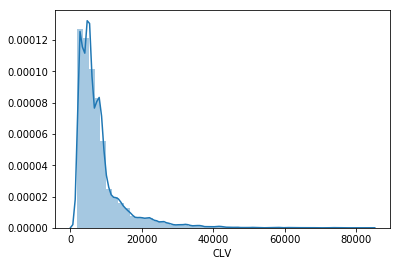

In [75]:
sns.distplot(df.CLV)

Text(0.5, 1.0, 'CLV before Outlier Treatment')

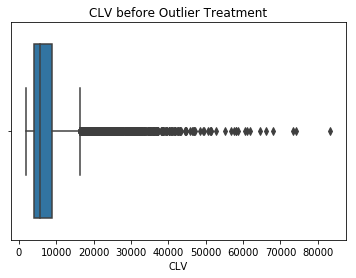

In [76]:
sns.boxplot(df.CLV)
plt.title('CLV before Outlier Treatment')

### CLV W/O LOG

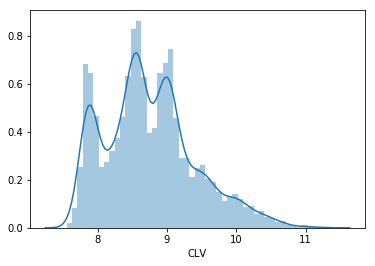

In [77]:
sns.distplot(np.log(df.CLV))

Text(0.5, 1.0, 'CLV after Log Transformation')

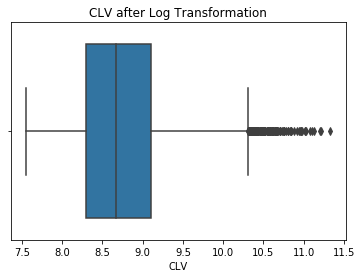

In [78]:
sns.boxplot(np.log(df.CLV))
plt.title('CLV after Log Transformation')

### Capping Outliers

In [79]:
x3 = df[(zscore(df['CLV'])<=4) & (zscore(df['CLV'])>=-4)]['CLV'].mean()

In [80]:
clv = df[(zscore(df['CLV'])<=4) & (zscore(df['CLV'])>=-4)]

In [81]:
clv.shape

(9036, 24)

In [82]:
9036/9134

0.9892708561418875

In [83]:
y3 = np.std(df[(zscore(df['CLV'])<=4) & (zscore(df['CLV'])>=-4)]['CLV'])

In [84]:
max_threshhold3 = x3 + (2*y3)

In [85]:
max_threshhold3

18935.998400171473

In [86]:
df['CLV_outliers'] = np.where(df['CLV']<max_threshhold3, df['CLV'], max_threshhold3)

Text(0.5, 1.0, 'CLV plot after Outlier treatment')

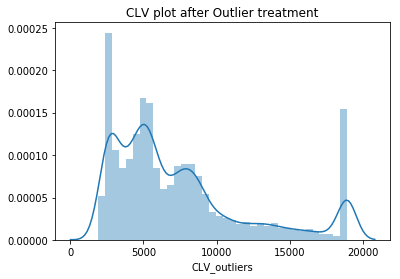

In [87]:
sns.distplot(df['CLV_outliers'])
plt.title('CLV plot after Outlier treatment')

Text(0.5, 1.0, 'CLV after Capping Outliers')

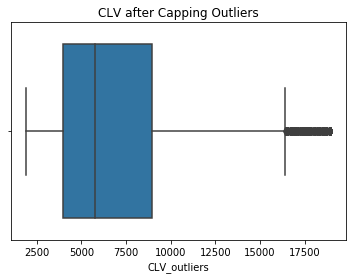

In [88]:
sns.boxplot(df['CLV_outliers'])
plt.title ('CLV after Capping Outliers')

# Base Model after Outlier treatment

In [89]:
features = df.drop(columns=['CLV_outliers', 'CLV'])
targets = pd.DataFrame(df['CLV_outliers'])


# Split into 70% training and 30% testing set
xtrain, xtest, ytrain, ytest = train_test_split(features, targets, test_size = 0.25, random_state = 42)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6850, 23)
(2284, 23)
(6850, 1)
(2284, 1)


In [90]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [91]:
baseline_guess = np.mean(ytrain)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: RMSE = %0.4f" % rmse(ytest, baseline_guess))

The baseline guess is a score of 7407.25
Baseline Performance on the test set: RMSE = 4751.9869


# Feature Extraction

In [92]:
df['Months Since Policy Inception'] = np.where(df['Months Since Policy Inception']==0, 1, df['Months Since Policy Inception'])

In [93]:
df['Annual_Claim_Amount'] = df['TCA']/(df['Months Since Policy Inception']/12)

In [94]:
df['Annual_Premium'] = df['MPA']*12

In [95]:
df['Per_policy_cost'] = df['TCA']/df['Number of Policies']

In [96]:
df['Claim'] = np.where(df['Months Since Last Claim']>df['Months Since Policy Inception'], 'No', 'Yes')

In [97]:
df['Vehicle_Class'].replace('Two-Door Car', 'low_class', inplace=True)

In [98]:
df['Vehicle_Class'].replace('Four-Door Car', 'low_class', inplace=True)

In [99]:
df['Vehicle_Class'].replace('SUV', 'med_class', inplace=True)

In [100]:
df['Vehicle_Class'].replace('Sports Car', 'med_class', inplace=True)

In [101]:
df['Vehicle_Class'].replace('Luxury SUV', 'high_class', inplace=True)

In [102]:
df['Vehicle_Class'].replace('Luxury Car', 'high_class', inplace=True)

In [103]:
df['Education'].replace('Master', 'Post_Graduate', inplace=True)

In [104]:
df['Education'].replace('Doctor', 'Post_Graduate', inplace=True)

In [105]:
df['Education'].replace('Bachelor', 'College_Graduate', inplace=True)

In [106]:
df['Education'].replace('College', 'College_Graduate', inplace=True)

In [107]:
df['EmploymentStatus'].replace('Disabled', 'Employes_Special', inplace=True)

In [108]:
df['EmploymentStatus'].replace('Retired', 'Employes_Special', inplace=True)

In [109]:
df['EmploymentStatus'].replace('Medical Leave', 'Employes_Special', inplace=True)

In [110]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location_Code', 'Marital_Status', 'MPA', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy_Type', 'Policy', 'Renew Offer Type',
       'Sales_Channel', 'TCA', 'Vehicle_Class', 'Vehicle_Size', 'CLV_outliers',
       'Annual_Claim_Amount', 'Annual_Premium', 'Per_policy_cost', 'Claim'],
      dtype='object')

# Feature Selection

In [111]:
df1 = df.drop(['Customer', 'Effective To Date'], axis=1)

In [112]:
df_dummy = pd.get_dummies(df1, drop_first=True)

In [113]:
df_dummy.shape

(9134, 49)

In [114]:
features = df_dummy.drop(['CLV', 'CLV_outliers'], axis=1)
target = df_dummy.CLV_outliers

In [115]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.25, random_state = 42)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6850, 47)
(2284, 47)
(6850,)
(2284,)


# Applying Regression Model and checking the assumptions

In [116]:
lr = LinearRegression()

In [117]:
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
ypred = lr.predict(xtest)

In [119]:
residual = ytest-ypred

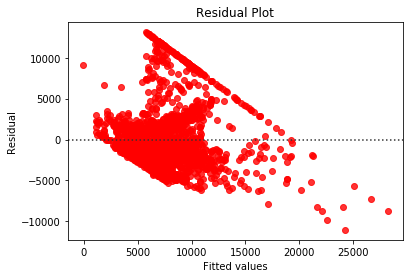

In [120]:
sns.residplot(x=ypred,y=residual,color='r')
plt.xlabel("Fitted values")
plt.ylabel("Residual")
plt.title ("Residual Plot")
plt.show()

# residual plot with respect to predicted values is not showing any pattern

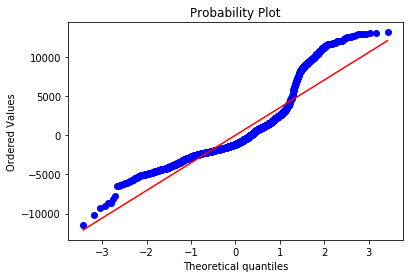

In [121]:
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=plt)
plt.show()

# QQ-PLOT

# Our residuals are not normal in nature.

In [122]:
from scipy.stats import shapiro
teststats,pvalue=shapiro(residual)
pvalue


#Residual is not normal in nature, therefore we cannot apply linear regression.

3.1747818007743056e-41

In [123]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(residual, xtest)

# There is no heteroskedasticity present

(0.8611341297362872, 0.9933435931886133, 'increasing')

In [124]:
model=smf.OLS(endog=target,exog=features).fit()

In [125]:
import statsmodels.api as sma
sma.stats.diagnostic.linear_rainbow(model)

# Our model is linear in nature.

(1.019126041703805, 0.26156968701395245)

In [126]:
df_dummy['constant']=1

In [127]:
vif = [variance_inflation_factor(features.values, i) for i in range (features.shape[1])] 

C:\Users\Rishima\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [128]:
pd.DataFrame({"vif":vif[0:]}, index = features.columns).T
# There is high multicollinearity present

Income  MPA  Months Since Last Claim  Months Since Policy Inception  \
vif  7.999188  inf                 3.723923                       6.504609   

     Number of Open Complaints  Number of Policies        TCA  \
vif                   1.189333            4.927859  20.119461   

     Annual_Claim_Amount  Annual_Premium  Per_policy_cost  State_California  \
vif              1.51788             inf         7.314007          2.860172   

     State_Nevada  State_Oregon  State_Washington  Response_Yes  \
vif      1.523274      2.531241          1.472489      1.355613   

     Coverage_Extended  Coverage_Premium  Education_High School or Below  \
vif           1.942243          1.776867                        1.521272   

     Education_Post_Graduate  EmploymentStatus_Employes_Special  \
vif                 1.234086                           1.801412   

     EmploymentStatus_Unemployed  Gender_M  Location_Code_Suburban  \
vif                     4.363381  1.997305                 10.0632   

     Location_Code_Urban  Marital_Status_Married  Marital_Status_Single  \
vif             2.324187                5.028224               3.154165   

     Policy_Type_Personal Auto  Policy_Type_Special Auto  Policy_Corporate L2  \
vif                        inf                       inf              2.61587   

     Policy_Corporate L3  Policy_Personal L1  Policy_Personal L2  \
vif             3.749116                 inf                 inf   

     Policy_Personal L3  Policy_Special L1  Policy_Special L2  \
vif                 inf                inf                inf   

     Policy_Special L3  Renew Offer Type_Offer2  Renew Offer Type_Offer3  \
vif                inf                 2.028169                  1.45364   

     Renew Offer Type_Offer4  Sales_Channel_Branch  Sales_Channel_Call Center  \
vif                 1.414254              1.761684                    1.54586   

     Sales_Channel_Web  Vehicle_Class_low_class  Vehicle_Class_med_class  \
vif           1.426147                28.749509                 7.295853   

     Vehicle_Size_Medsize  Vehicle_Size_Small  Claim_Yes  
vif              7.823698            2.919636  11.577503

# Comparing various models on basis of rmse and rscore

## By capping outliers

In [129]:
df1 = df.drop(['Customer', 'Effective To Date', 'Policy_Type'], axis=1)

df_dummy = pd.get_dummies(df1, drop_first=True)

features = df_dummy.drop(['CLV', 'CLV_outliers'], axis=1)
target = df_dummy.CLV_outliers

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.25, random_state = 42)


print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

sc = StandardScaler()

x_train = sc.fit_transform(xtrain)
x_test = sc.fit_transform(xtest)

(6850, 45)
(2284, 45)
(6850,)
(2284,)


C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Linear Regression

In [130]:
lr = LinearRegression()

lr.fit(x_train, ytrain)

ypred = lr.predict(x_test)

lr_rmse = np.sqrt(mean_squared_error(ytest, ypred))
print(lr_rmse)
lr_mape = np.mean(np.abs((ytest - ypred) / ytest)) * 100
print(lr_mape)

print("Training Score : ",lr.score(x_train,ytrain))
print("Testing Score : ",lr.score(x_test, ytest))

3801.1136135062748
45.53498460737057
Training Score :  0.38938788154425674
Testing Score :  0.35989621621844836


### Ridge Regression

In [131]:
R = Ridge()

R.fit(x_train, ytrain)

ypred1 = R.predict(x_test)

r_rmse = np.sqrt(mean_squared_error(ytest, ypred1))
print(r_rmse)
r_mape = np.mean(np.abs((ytest - ypred1) / ytest)) * 100
print(r_mape)

print("Training Score : ",R.score(x_train,ytrain))
print("Testing Score : ",R.score(x_test, ytest))

3800.8337303497883
45.52400173096304
Training Score :  0.3893830012962872
Testing Score :  0.35999047684307894


### Applying Lasso Regression

In [132]:
L = Lasso()

L.fit(x_train, ytrain)

ypred2 = L.predict(x_test)

l_rmse = np.sqrt(mean_squared_error(ytest, ypred2))
print(l_rmse)
l_mape = np.mean(np.abs((ytest - ypred2) / ytest)) * 100
print(l_mape)

print("Training Score : ",L.score(x_train,ytrain))
print("Testing Score : ",L.score(x_test, ytest))

3799.1439173370345
45.52078464667313
Training Score :  0.3893634200334619
Testing Score :  0.36055943412241875


C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Applying Decision Tree

In [133]:
DTR = DecisionTreeRegressor(random_state=42)

DTR.fit(x_train, ytrain)

ypred3 = DTR.predict(x_test)

dt_rmse = np.sqrt(mean_squared_error(ytest, ypred3))
print(dt_rmse)
dt_mape = np.mean(np.abs((ytest - ypred3) / ytest)) * 100
print(dt_mape)

print("Training Score : ",DTR.score(x_train,ytrain))
print("Testing Score : ",DTR.score(x_test, ytest))

2458.390624522663
8.598232124477473
Training Score :  1.0
Testing Score :  0.7322493862038392


### Applying Random Forest

In [134]:
RFR = RandomForestRegressor()

RFR.fit(x_train, ytrain)

ypred4 = RFR.predict(x_test)

rf_rmse = np.sqrt(mean_squared_error(ytest, ypred4))
print(rf_rmse)
rf_mape = np.mean(np.abs((ytest - ypred4) / ytest)) * 100
print(rf_mape)

print("Training Score : ",RFR.score(x_train,ytrain))
print("Testing Score : ",RFR.score(x_test, ytest))

C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1915.57014135837
7.926540062334436
Training Score :  0.9701657601355834
Testing Score :  0.8374358375099182


### Applying Gradient Boost

In [135]:
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(x_train, ytrain)

ypred5 = GBR.predict(x_test)

gb_rmse = np.sqrt(mean_squared_error(ytest, ypred5))
print(gb_rmse)
gb_mape = np.mean(np.abs((ytest - ypred5) / ytest)) * 100
print(gb_mape)

print("Training Score : ",GBR.score(x_train,ytrain))
print("Testing Score : ",GBR.score(x_test, ytest))

1909.4633965489584
9.525201756151388
Training Score :  0.8499371384364276
Testing Score :  0.838470678713577


###  Applying AdaBoost 

In [136]:
ABR = AdaBoostRegressor(random_state=42)
ABR.fit(x_train, ytrain)

ypred6 = ABR.predict(x_test)

ab_rmse = np.sqrt(mean_squared_error(ytest, ypred6))
print(ab_rmse)
ab_mape = np.mean(np.abs((ytest - ypred6) / ytest)) * 100
print(ab_mape)
print("Training Score : ",ABR.score(x_train,ytrain))
print("Testing Score : ",ABR.score(x_test, ytest))

2221.755445915983
19.265310661421665
Training Score :  0.7701003001357651
Testing Score :  0.7813138897766472


## By transforming with Log

In [137]:
df1 = df.drop(['Customer', 'Effective To Date', 'Policy_Type'], axis=1)

df_dummy = pd.get_dummies(df1, drop_first=True)

features = df_dummy.drop(['CLV', 'CLV_outliers'], axis=1)
target = df_dummy.CLV

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.25, random_state = 42)


print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

ytrain_log = np.log(ytrain)

sc = StandardScaler()

x_train = sc.fit_transform(xtrain)
x_test = sc.transform(xtest)

(6850, 45)
(2284, 45)
(6850,)
(2284,)


C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rishima\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


### Linear Regression

In [138]:
lr = LinearRegression()

lr.fit(x_train, ytrain_log)

ypred_log = lr.predict(x_test)

ypred7 = np.exp(ypred_log)

lr_log_rmse = np.sqrt(mean_squared_error(ytest, ypred7))
print(lr_log_rmse)
lr_log_mape = np.mean(np.abs((ytest - ypred7) / ytest)) * 100
print(lr_log_mape)

print("Training Score : ",lr.score(x_train,ytrain_log))
print("Testing Score : ",lr.score(x_test, ytest))

7419.365819207504
38.026433037889774
Training Score :  0.4364867816588758
Testing Score :  -1.2629259810125055


### Ridge Regression

In [139]:
R = Ridge()

R.fit(x_train, ytrain_log)

ypred_log1 = R.predict(x_test)

ypred8 = np.exp(ypred_log1)

r_log_rmse = np.sqrt(mean_squared_error(ytest, ypred8))
print(r_log_rmse)
r_log_mape = np.mean(np.abs((ytest - ypred8) / ytest)) * 100
print(r_log_mape)

print("Training Score : ",R.score(x_train,ytrain_log))
print("Testing Score : ",R.score(x_test, ytest))

7415.40850339601
38.01718748372798
Training Score :  0.43646423763578285
Testing Score :  -1.2629259953416043


### Applying Lasso Regression

In [140]:
L = Lasso()

L.fit(x_train, ytrain_log)

ypred_log2 = L.predict(x_test)

ypred9 = np.exp(ypred_log2)

l_log_rmse = np.sqrt(mean_squared_error(ytest, ypred9))
print(l_log_rmse)
l_log_mape = np.mean(np.abs((ytest - ypred9) / ytest)) * 100
print(l_log_mape)

print("Training Score : ",L.score(x_train,ytrain_log))
print("Testing Score : ",L.score(x_test, ytest))

7274.4324121976215
57.564753533054535
Training Score :  0.0
Testing Score :  -1.26298266980626


### Applying Decision Tree

In [141]:
DTR = DecisionTreeRegressor(random_state=42)

DTR.fit(x_train, ytrain_log)

ypred_log3 = DTR.predict(x_test)

ypred10 = np.exp(ypred_log3)

dt_log_rmse = np.sqrt(mean_squared_error(ytest, ypred10))
print(dt_log_rmse)
dt_log_mape = np.mean(np.abs((ytest - ypred10) / ytest)) * 100
print(dt_log_mape)
print("Training Score : ",DTR.score(x_train,ytrain_log))
print("Testing Score : ",DTR.score(x_test, ytest))

5044.432189099785
11.358704685506918
Training Score :  0.999999989937638
Testing Score :  -1.2628520144472555


### Applying Random Forest

In [142]:
RFR = RandomForestRegressor()

RFR.fit(x_train, ytrain_log)

ypred_log4 = RFR.predict(x_test)

ypred11 = np.exp(ypred_log4)

rf_log_rmse = np.sqrt(mean_squared_error(ytest, ypred11))
print(rf_log_rmse)

rf_log_mape = np.mean(np.abs((ytest - ypred11) / ytest)) * 100
print(rf_log_mape)

print("Training Score : ",RFR.score(x_train,ytrain_log))
print("Testing Score : ",RFR.score(x_test, ytest))


C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


3999.9715145182113
8.837614658208363
Training Score :  0.9835059988900041
Testing Score :  -1.2628500197033932


### Applying Gradient Boost

In [143]:
GBR = GradientBoostingRegressor(random_state=42)

GBR.fit(x_train, ytrain_log)

ypred_log5 = GBR.predict(x_test)

ypred12 = np.exp(ypred_log5)

gb_log_rmse = np.sqrt(mean_squared_error(ytest, ypred12))
print(gb_log_rmse)

gb_log_mape = np.mean(np.abs((ytest - ypred12) / ytest)) * 100
print(gb_log_mape)

print("Training Score : ",GBR.score(x_train,ytrain_log))
print("Testing Score : ",GBR.score(x_test, ytest))

4174.403845544883
9.835293836739174
Training Score :  0.9117946467276722
Testing Score :  -1.262859272594746


###  Applying AdaBoost 

In [144]:
ABR = AdaBoostRegressor(random_state=42)

ABR.fit(x_train, ytrain_log)

ypred_log6 = ABR.predict(x_test)

ypred13 = np.exp(ypred_log6)

ab_log_rmse = np.sqrt(mean_squared_error(ytest, ypred13))
print(ab_log_rmse)

ab_log_mape = np.mean(np.abs((ytest - ypred13) / ytest)) * 100
print(ab_log_mape)

print("Training Score : ",ABR.score(x_train,ytrain_log))
print("Testing Score : ",ABR.score(x_test, ytest))

4167.094390647842
20.943532791920212
Training Score :  0.842750958186814
Testing Score :  -1.2628122387162277


# Final Model

Gradient Boosting with clv_outliers

In [145]:
df1 = df.drop(['Customer', 'Effective To Date', 'TCA', 'Annual_Premium', 'Policy_Type'], axis=1)

df_dummy = pd.get_dummies(df1, drop_first=True)

features = df_dummy.drop(['CLV', 'CLV_outliers'], axis=1)
target = df_dummy.CLV_outliers

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.25, random_state = 42)


print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

sc = StandardScaler()

x_train = pd.DataFrame(sc.fit_transform(xtrain), columns = xtrain.columns)
x_test = pd.DataFrame(sc.fit_transform(xtest), columns = xtest.columns)

(6850, 43)
(2284, 43)
(6850,)
(2284,)


C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [146]:
GBR = GradientBoostingRegressor(random_state = 42)

GBR.fit(x_train, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(x_train.columns), 
                                'importance': GBR.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0             Number of Policies    0.733790
1                            MPA    0.242273
2                         Income    0.006945
3        Vehicle_Class_low_class    0.003324
4                Per_policy_cost    0.003127
5            Annual_Claim_Amount    0.001978
6  Months Since Policy Inception    0.001711
7      Number of Open Complaints    0.001266
8        Months Since Last Claim    0.001023
9                   Response_Yes    0.000922

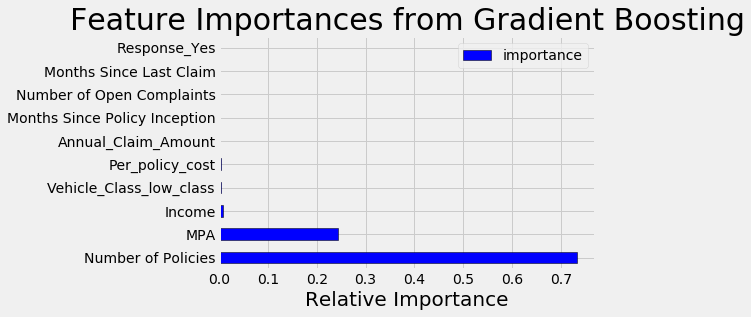

In [148]:
# plt.figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Gradient Boosting', size = 30);

In [149]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:5]

# Find the index that corresponds to each feature name
indices = [list(x_train.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = x_train.iloc[:, indices]
X_test_reduced = x_test.iloc[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6850, 5)
Most important testing  features shape:  (2284, 5)


In [150]:
GBR = GradientBoostingRegressor(random_state = 42)

GBR.fit(X_reduced, ytrain)

ypred = GBR.predict(X_test_reduced)

In [151]:
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print(rmse)

mape = np.mean(np.abs((ytest - ypred) / ytest)) * 100
print(mape)

print("Training Score : ",GBR.score(X_reduced,ytrain))
print("Testing Score : ",GBR.score(X_test_reduced, ytest))

# Since we are getting more rmse by reducing the features, we'll keep all features.

1939.2174333913292
9.750252493399271
Training Score :  0.8474747062140096
Testing Score :  0.8333974261185343


# HyperParameter Tuning

In [152]:
gbr = GradientBoostingRegressor (alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=80,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

gbr.fit(x_train,ytrain)

ypred_final = gbr.predict(x_test)

final_gbr_rmse = np.sqrt(mean_squared_error(ytest, ypred_final))
print(final_gbr_rmse)

final_gbr_mape = np.mean(np.abs((ytest - ypred_final) / ytest)) * 100
print(final_gbr_mape)

print("Training Score : ",gbr.score(x_train,ytrain))
print("Testing Score : ",gbr.score(x_test, ytest))

1882.4813885527594
9.085747543194515
Training Score :  0.8814059468773056
Testing Score :  0.8430034620922086


# Final Model

Random Forest


In [153]:
df1 = df.drop(['Customer', 'Effective To Date', 'TCA', 'Annual_Premium', 'Policy_Type'], axis=1)

df_dummy = pd.get_dummies(df1, drop_first=True)

features = df_dummy.drop(['CLV', 'CLV_outliers'], axis=1)
target = df_dummy.CLV_outliers

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.25, random_state = 42)


print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

sc = StandardScaler()

x_train = pd.DataFrame(sc.fit_transform(xtrain), columns = xtrain.columns)
x_test = pd.DataFrame(sc.fit_transform(xtest), columns = xtest.columns)

(6850, 43)
(2284, 43)
(6850,)
(2284,)


C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [154]:
rfr = RandomForestRegressor(random_state = 42)

rfr.fit(x_train, ytrain)

C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [155]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(x_train.columns), 
                                'importance': rfr.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0              Number of Policies    0.621651
1                             MPA    0.226082
2                 Per_policy_cost    0.021652
3                          Income    0.019052
4             Annual_Claim_Amount    0.017972
5   Months Since Policy Inception    0.016943
6         Months Since Last Claim    0.016568
7       Number of Open Complaints    0.005137
8  Education_High School or Below    0.004337
9                        Gender_M    0.002764

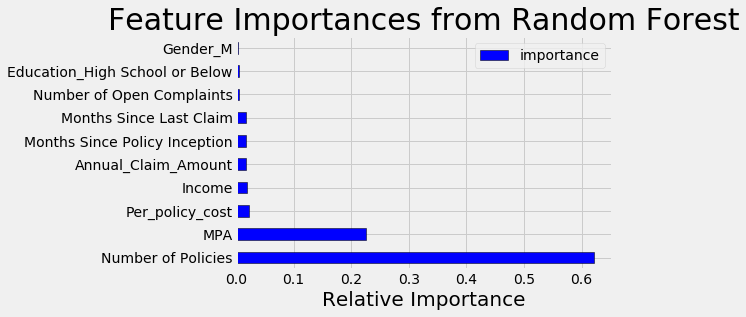

In [156]:
# plt.figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

In [157]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(x_train.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = x_train.iloc[:, indices]
X_test_reduced = x_test.iloc[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6850, 10)
Most important testing  features shape:  (2284, 10)


In [158]:
rfr = RandomForestRegressor(random_state = 42)

rfr.fit(X_reduced, ytrain)

ypred = rfr.predict(X_test_reduced)

C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [159]:
final_rfr_rmse = np.sqrt(mean_squared_error(ytest, ypred))
print(final_rfr_rmse)

final_rfr_mape = np.mean(np.abs((ytest - ypred) / ytest)) * 100
print(final_rfr_mape)

print("Training Score : ",rfr.score(X_reduced,ytrain))
print("Testing Score : ",rfr.score(X_test_reduced, ytest))

# Since we are getting more rmse by reducing the features, we'll keep all features.

1924.8285657982888
8.08879028705323
Training Score :  0.9709721430201341
Testing Score :  0.8358606143282031


In [161]:
rfr = RandomForestRegressor (bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

rfr.fit(x_train,ytrain)

ypred_final = rfr.predict(x_test)

rmse = np.sqrt(mean_squared_error(ytest, ypred_final))
print(rmse)

mape = np.mean(np.abs((ytest - ypred_final) / ytest)) * 100
print(mape)

print("Training Score : ",rfr.score(x_train,ytrain))
print("Testing Score : ",rfr.score(x_test, ytest))

1815.0004143249653
7.585055153840484
Training Score :  0.9668853879143541
Testing Score :  0.8540573761143201


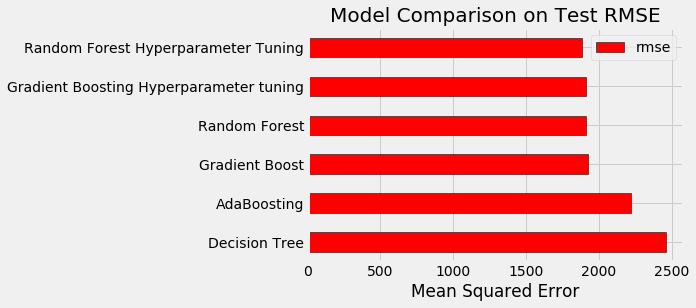

In [165]:
model_comparison = pd.DataFrame({'model': ['Decision Tree', 'Random Forest', 
                                           'Gradient Boosting Hyperparameter tuning', 'AdaBoosting', 'Random Forest Hyperparameter Tuning', 'Gradient Boost'],
                                 
                                 'rmse': [dt_rmse, rf_rmse, gb_rmse, ab_rmse, final_gbr_rmse, final_rfr_rmse]}) 
                                         

# Horizontal bar chart of test mae
model_comparison.sort_values('rmse', ascending = False).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Squared Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test RMSE', size = 20);